# Continuation of Expected Points Added Exploration and Analysis
## Historical Performance

In this notebook, I continue my exploration of Expected Points Added. With the analysis conducted in the last notebook, I create a formula that streamlines my analysis for a single season into one formula. You can see that in the top_rbs formula. I use this to analyze historical data points.

In [89]:
import nfl_data_py as nfl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

In [62]:
cols = ['rusher_player_name', 'rusher_player_id','posteam','play_id','week','down', 'yardline_100', 'ydstogo' ,'yards_gained', 'ep','epa', 'rush_touchdown']

In [63]:
def top_rbs(year, min_yds):
    df = nfl.import_pbp_data([year])
    roster = nfl.import_rosters([year])
    pos = roster[['player_id','position']]
    #load dfs. get roster data with player_id and position.
    
    runs = df.loc[(df['season_type'] == 'REG') & (df['play_type'] == 'run'), cols]
    #filter out regular season running plays
    
    top_filter = runs.groupby('rusher_player_id').agg(rushing_yards=('yards_gained','sum'))
    top_filter = top_filter.loc[top_filter['rushing_yards'] >= min_yds]
    top_filter = top_filter.reset_index()
    top_filter = top_filter.rename(columns={'rusher_player_id':'player_id'})
    top_filter = pd.merge(top_filter,pos,on='player_id')
    top_filter = top_filter[top_filter['position']=='RB']
    #get RBs who ran for 1000 or more yards in season
    
    runs_by_top_rbs = runs[runs['rusher_player_id'].isin(top_filter['player_id'])]
    #filter pbp data for only RBs that ran for 1000+ yds in season
    
    top_rbs_grouped = runs_by_top_rbs.groupby('rusher_player_name').agg(attempts=('rusher_player_id', 'count'),
                                                                    rushing_yards=('yards_gained','sum'),
                                                                    rushing_tds=('rush_touchdown', 'sum'),
                                                                    total_epa=('epa', 'sum'),
                                                                    positive_pct_epa=('epa', lambda x: (x>=0).mean()))
    #top_rbs_grouped['positive_pct_epa'] = top_rbs_grouped['positive_pct_epa'].map(format_pct)
    top_rbs_grouped['season'] = str(year)
    top_rbs_grouped['name_and_season'] = top_rbs_grouped.index + ', ' + top_rbs_grouped['season']
    #group pbp data by running back. aggregate columns to get season attempts, rushing yards, rushing touchdowns,
    #season total epa, and percentage of plays that gained positive epa
    #format percentage epa column into %
    
    return top_rbs_grouped

In [64]:
def tbl_concat(years, threshold):
    tbl = top_rbs(years[0], threshold)
    for x in years[1:]:
        temp = top_rbs(x, threshold)
        tbl = pd.concat([tbl, temp])
    return tbl 
    
epa = tbl_concat([2022,2021,2020,2019,2018], 1000)
epa.sort_values(by='positive_pct_epa',ascending=False)

2022 done.
Downcasting floats.
2021 done.
Downcasting floats.
2020 done.
Downcasting floats.
2019 done.
Downcasting floats.
2018 done.
Downcasting floats.


,attempts,rushing_yards,rushing_tds,total_epa,positive_pct_epa,season,name_and_season
rusher_player_name,,,,,,,
M.Sanders,260,1269.0,11.0,12.698614,0.488462,2022,"M.Sanders, 2022"
D.Henry,380,2029.0,17.0,33.751442,0.481579,2020,"D.Henry, 2020"
D.Cook,315,1563.0,16.0,16.153913,0.476190,2020,"D.Cook, 2020"
M.Ingram,115,587.0,7.0,6.812599,0.469565,2019,"M.Ingram, 2019"
T.Gurley,260,1255.0,17.0,21.408102,0.465385,2018,"T.Gurley, 2018"
A.Jones,213,1121.0,2.0,12.084998,0.464789,2022,"A.Jones, 2022"
P.Lindsay,193,1037.0,9.0,5.106750,0.461140,2018,"P.Lindsay, 2018"
M.Ingram II,89,435.0,3.0,9.722083,0.460674,2019,"M.Ingram II, 2019"
J.Taylor,232,1169.0,11.0,14.960917,0.456897,2020,"J.Taylor, 2020"


In [74]:
len(epa)

55

We now have a dataset of all the 1,000+ yard rushers from the last 5 seasons. The data isn't pretty for Walker - his 33% positive EPA percentage ranked dead last amongst qualifying RBs (54 (Mark Ingram was counted twice due to an error in the dataset with his identifying name)).

In [66]:
tbl.groupby('season')['positive_pct_epa'].mean()

season
2018    0.414476
2019    0.396813
2020    0.426902
2021    0.412406
2022    0.409337
Name: positive_pct_epa, dtype: float64

Historically, the top running backs produce positive plays on ~41% of their attempts. Walker is significantly below this mark. While his total accumulated EPA isn't as bad as some other instances (Dalvin Cook, 2022, yeesh), we can see that the hypothesis of Walker as an inconsistent runner certainly has some truth to it.

I'm going to bring in NFL's "Next Gen Stat" Rushing data now, to look at Rushing Yards Over Expected in tandem with EPA. You can read my exploration and analysis of this data in SQL here: https://medium.com/@nrahul11/exploration-and-analysis-of-rushing-yards-over-expected-data-30f9ac4c6fa1

In this notebook, I want to create a table with the percentages for both EPA and RYOE for these top rushers, to create some visualizations.

In [67]:
ngs_dataset = nfl.import_ngs_data("rushing", list(range(2018,2023)))

In [69]:
ngs = ngs_dataset.loc[(ngs_dataset['week']==0) & (ngs_dataset['rush_yards'] >= 1000),
                      ['player_short_name', 'season','rush_attempts', 'rush_yards', 'expected_rush_yards',
                      'rush_yards_over_expected', 'rush_pct_over_expected']]
ngs['name_and_season'] = [x + ", " + str(y) for x, y in zip(ngs['player_short_name'], ngs['season'])]
ngs.sort_values(by='rush_pct_over_expected', ascending=False)

,player_short_name,season,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,rush_pct_over_expected,name_and_season
3581,A.Jones,2022,213,1121,921.800750,141.199250,0.487805,"A.Jones, 2022"
1789,E.Elliott,2019,301,1357,1224.169068,121.830932,0.474747,"E.Elliott, 2019"
3587,T.Etienne,2022,220,1125,850.338832,262.661168,0.462963,"T.Etienne, 2022"
3570,N.Chubb,2022,302,1525,1133.999550,389.000450,0.458472,"N.Chubb, 2022"
1202,D.Henry,2018,215,1059,749.380302,217.619698,0.457286,"D.Henry, 2018"
1200,C.Carson,2018,247,1151,1021.586768,125.413232,0.457143,"C.Carson, 2018"
3586,T.Allgeier,2022,210,1035,832.585453,154.414547,0.456311,"T.Allgeier, 2022"
2362,D.Henry,2020,378,2027,1585.166749,411.833251,0.453804,"D.Henry, 2020"
2391,D.Cook,2020,312,1557,1292.028584,251.971416,0.453074,"D.Cook, 2020"
2376,J.Taylor,2020,232,1169,966.241070,179.758930,0.449782,"J.Taylor, 2020"


There we go. Again, Walker ranks towards the bottom, finishing second to last. Let's merge these tables so we can visualize the data.

In [70]:
epa = epa.reset_index()
epa = epa[['name_and_season', 'positive_pct_epa']]
ngs = ngs[['name_and_season', 'rush_pct_over_expected']]
comb = pd.merge(ngs, epa, on='name_and_season', how='outer')
comb

,name_and_season,rush_pct_over_expected,positive_pct_epa
0,"S.Barkley, 2018",0.338521,0.338403
1,"C.McCaffrey, 2018",0.363208,0.438356
2,"A.Peterson, 2018",0.336066,0.382470
3,"C.Carson, 2018",0.457143,0.400810
4,"D.Henry, 2018",0.457286,0.423256
5,"J.Mixon, 2018",0.390558,0.409283
6,"E.Elliott, 2018",0.421927,0.411184
7,"P.Lindsay, 2018",0.418478,0.461140
8,"T.Gurley, 2018",0.419608,0.465385
9,"L.Fournette, 2019",0.318008,0.353383


There we go (almost). We've got a few missing values to take care of, however. 

The easy one to solve is the Ja.Williams vs J.Williams (Jamaal Williams, Detroit Lions). It looks like Ingram had one player_id, but two separate names in the dataset. I will need to explore why Barkley's data is missing in RYOE for 2019.

In [82]:
barkley = ngs_dataset.loc[(ngs_dataset['player_short_name']=='S.Barkley')&(ngs_dataset['week']==0), ['season','rush_yards','rush_pct_over_expected']]
barkley

,season,rush_yards,rush_pct_over_expected
1179,2018,1307,0.338521
1781,2019,979,0.342857
2974,2021,593,0.360248
3613,2022,1312,0.390244


Huh? From all accounts, Saquon actually had 1,003 rushing yards in 2019, but the NGS dataset lists him at 979. Is this because it only counts certain weeks (presumably because of number of attempts in a single week), and not the whole season. I'm going to look at the sum of all week =/= 0

In [50]:
test = ngs_dataset.loc[(ngs_dataset['player_short_name']=='S.Barkley')&(ngs_dataset['week']!=0)&(ngs_dataset['season']==2019), ['season','rush_yards','rush_pct_over_expected']]

In [51]:
test['rush_yards'].sum()

969

Genuinely not sure what has gone on with Saquon's season data in 2019, but we have the datapoint we need for him. Let's clean up the final table.

In [84]:
comb.at[50, 'positive_pct_epa'] = comb.at[53, 'positive_pct_epa']
comb.at[55, 'rush_pct_over_expected'] = barkley.at[1781, 'rush_pct_over_expected']
comb = comb.drop(index=[53,54])
comb

,name_and_season,rush_pct_over_expected,positive_pct_epa
0,"S.Barkley, 2018",0.338521,0.338403
1,"C.McCaffrey, 2018",0.363208,0.438356
2,"A.Peterson, 2018",0.336066,0.382470
3,"C.Carson, 2018",0.457143,0.400810
4,"D.Henry, 2018",0.457286,0.423256
5,"J.Mixon, 2018",0.390558,0.409283
6,"E.Elliott, 2018",0.421927,0.411184
7,"P.Lindsay, 2018",0.418478,0.461140
8,"T.Gurley, 2018",0.419608,0.465385
9,"L.Fournette, 2019",0.318008,0.353383


And we're done! For the M.Ingram example, I should have gone back and manually recalculated the EPA percentage, but as they were very similar for both Ingrams (~46%), I left it for this exercise. Let's make a scatter plot:

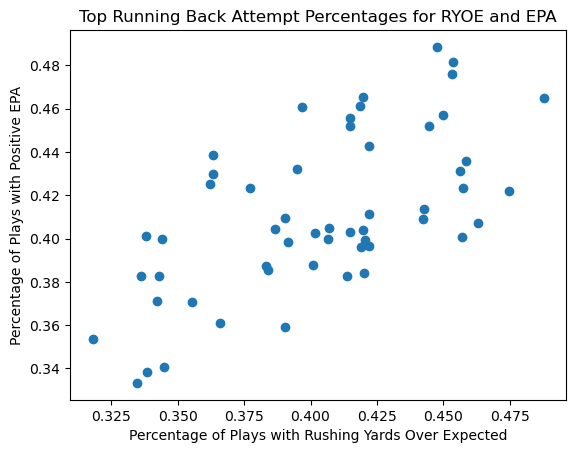

In [85]:
plt.scatter(comb['rush_pct_over_expected'], comb['positive_pct_epa'])
plt.title("Top Running Back Attempt Percentages for RYOE and EPA")
plt.xlabel('Percentage of Plays with Rushing Yards Over Expected')
plt.ylabel('Percentage of Plays with Positive EPA')

Ta-da! Here's the plot. Let's highlight Walker on this to really drive home the point.

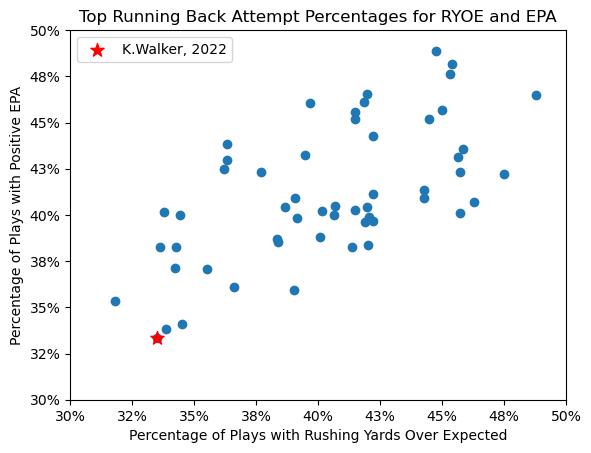

In [92]:
name_season = comb['name_and_season']
rush_pct_over_expected = comb['rush_pct_over_expected']
positive_pct_epa = comb['positive_pct_epa']

# Create the scatter plot
plt.scatter(rush_pct_over_expected, positive_pct_epa)

# Highlight a specific data point
highlight_index = 45  # Index of the data point to highlight
highlight_x = rush_pct_over_expected[highlight_index]
highlight_y = positive_pct_epa[highlight_index]
plt.scatter(highlight_x, highlight_y, color='red', marker='*', s=100, label=name_season[highlight_index])

# Customize the plot (optional)
plt.title("Top Running Back Attempt Percentages for RYOE and EPA")
plt.xlabel('Percentage of Plays with Rushing Yards Over Expected')
plt.ylabel('Percentage of Plays with Positive EPA')
plt.legend()

plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
plt.xlim(0.3, 0.5)
plt.ylim(0.3,0.5)

# Display the plot
plt.show()

And there you have it. Walker honestly doesn't deserve the star as his marker, but the conclusion is clear - his performance was extremely inconsistent when you look at either RYOE or EPA - historically so, in fact.

While Walker is an explosive back capable of breaking off big plays, his inconsistent outcomes from down-to-down explain why Seahawks added in Zach Charbonnet.

Thank you for reading!